In [9]:
import import_ipynb
import matplotlib.pyplot as plt
from FULL_DATA import final_df

In [10]:
# final_df.groupby(by='TICKER').transform(lambda x: x.shift(1))
final_df['NEXT_RATING'] = final_df.groupby('TICKER')['ratings'].shift(1)
final_df['Rating_Change'] = (final_df['ratings']-final_df['NEXT_RATING']) 
final_df.dropna(inplace = True)
print(final_df.shape[0])
final_df['SENTIMENT'] = [1 if x > 0 else 0 if x ==0 else -1 for x in final_df['Rating_Change']]
final_df.head(20)

2397


,TRANSCRIPTS,TICKER,TRANSCRIPT_DATE,RATINGS_DATE,ratings,DATE_DIFF,KEY,NEXT_RATING,Rating_Change,SENTIMENT
14588,"['Image source: The Motley Fool.', 'Agilent Te...",A,2019-01-31,2019-03-29,5.000,57 days,A_2019-03-29,4.571,0.429,1
14585,"['Image source: The Motley Fool.', 'Agilent Te...",A,2019-05-14,2019-06-28,4.867,45 days,A_2019-06-28,5.000,-0.133,-1
14582,"['Image source: The Motley Fool.', 'Agilent Te...",A,2019-08-14,2019-09-30,4.286,47 days,A_2019-09-30,4.867,-0.581,-1
14579,"['Image source: The Motley Fool.', 'Agilent Te...",A,2019-11-25,2019-12-31,4.067,36 days,A_2019-12-31,4.286,-0.219,-1
15677,"['Image source: The Motley Fool.', 'ALCOA CORP...",AA,2019-04-17,2019-06-28,4.294,72 days,AA_2019-06-28,4.444,-0.150,-1
15674,"['Image source: The Motley Fool.', 'Alcoa Corp...",AA,2019-07-17,2019-09-30,3.875,75 days,AA_2019-09-30,4.294,-0.419,-1
15671,"['Image source: The Motley Fool.', 'Alcoa Corp...",AA,2019-10-16,2019-12-31,3.533,76 days,AA_2019-12-31,3.875,-0.342,-1
8306,"['Image source: The Motley Fool.', 'Advance Au...",AAP,2019-08-13,2019-09-30,4.238,48 days,AAP_2019-09-30,4.364,-0.126,-1
8303,"['Image source: The Motley Fool.', 'Advance Au...",AAP,2019-11-12,2019-12-31,4.043,49 days,AAP_2019-12-31,4.238,-0.195,-1
12,"['Image source: The Motley Fool.', 'Apple, Inc...",AAPL,2019-01-31,2019-03-29,3.978,57 days,AAPL_2019-03-29,3.980,-0.002,-1


In [11]:
final_df['SENTIMENT'].value_counts()

-1    1071
 1     809
 0     517
Name: SENTIMENT, dtype: int64

In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grays\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


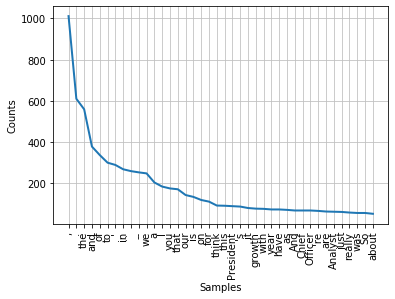

In [19]:
# final_df.reset_index(inplace = True)
token1 = word_tokenize(final_df['TRANSCRIPTS'][0])
fdist = FreqDist(token1)

fdist.plot(40,cumulative=False)
plt.show()

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
# token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words = 'english',ngram_range = (1,1))
text_counts= cv.fit_transform(final_df['TRANSCRIPTS'])


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, final_df['SENTIMENT'], test_size=0.2, random_state=1)

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.41875


In [51]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, multi_class= 'multinomial',solver = 'lbfgs',max_iter=200).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Logistic Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Accuracy: 0.3875


C:\Users\grays\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=1)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print("RF Accuracy:",metrics.accuracy_score(y_test, predicted))
clf.predict_proba(X_test)

C:\Users\grays\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF Accuracy: 0.4583333333333333


array([[0.4, 0.2, 0.4],
       [0.7, 0.1, 0.2],
       [0.4, 0.3, 0.3],
       ...,
       [0.6, 0.1, 0.3],
       [0.3, 0.2, 0.5],
       [0.3, 0.4, 0.3]])

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(final_df['TRANSCRIPTS'])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, final_df['SENTIMENT'], test_size=0.15, random_state=1)
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
clf = RandomForestClassifier(max_depth=100, random_state=1)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print("RF Accuracy:",metrics.accuracy_score(y_test, predicted))
clf.predict_proba(X_test)

MultinomialNB Accuracy: 0.4666666666666667


C:\Users\grays\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF Accuracy: 0.4444444444444444


array([[0.5, 0.3, 0.2],
       [0.2, 0.3, 0.5],
       [0.5, 0.2, 0.3],
       ...,
       [0.6, 0.1, 0.3],
       [0.6, 0.1, 0.3],
       [0.3, 0.3, 0.4]])